**DINAMICA DI UN POLIMERO SEMI-FLESSIBILE**

INTRODUZIONE:


Quando si parla di dinamica di un filamento di DNA sintetico ci si riferisce al modo in cui questo filamento si comporta e interagisce con il suo ambiente. Ci riferiamo principalmente a due aspetti principali:


*   Struttura e Conformazione: il DNA sintetico, come quello naturale, può assumere diverse conformazioni e strutture a seconda delle condizioni ambientali e delle interazioni molecolari.
*   Interazioni molecolari: il DNA sintetico può interagire con altre molecole biologiche e con l'ambiente circostante. Queste interazioni sono cruciali per la regolazione dell'espressione genica e per altri processi biologici in cui il DNA è coinvolto.

Le varie strutture che il DNA può assumere sono essenziali per le sue funzioni biologiche. Queste strutture non solo influenzano la stabilità e l'accessibilità del DNA, ma sono anche cruciali per l'interazione con altre molecole biologiche, contribuendo a processi come la replicazione, la trascrizione e la riparazione del DNA. La comprensione di queste dinamiche è fondamentale in molti campi della ricerca biologica e medica.

Vogliamo qui studiare le diverse strutture che un filamento può assumere.

SIMULAZIONE DELLA WORM-LIKE-CHAIN

Una worm-like-chain (WLC) è un modello che descrive un polimero semi-flessibile, diviso in segmenti successivi la cui direzione dipende da due parametri, gli angoli polari $(\phi, θ)$, che poi vedremo come vengono scelti nel codice, e caratterizzata da una lunghezza di persistenza $l_p$, cioè la lunghezza su cui la direzione della catena si mantiene correlata (rigida). Qui simuliamo una WLC, che sarà il punto di partenza per le considerazioni successive.

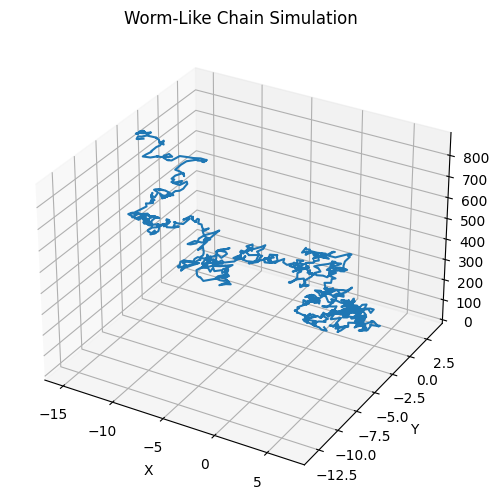

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri del modello WLC
N = 1000  # Numero di segmenti in cui divido la catena
b = 1.0   # Lunghezza di ogni segmento
lp = 10.0 # Lunghezza di persistenza
delta_theta = np.sqrt(2 * b / lp)  # Delta(theta) rappresenta una misura della flessibilità della catena e viene utilizzato per determinare la distribuzione degli angoli di direzione (theta) nella generazione della catena (Laurence et al.).

# Funzione per la distribuzione P(theta) ~ theta * exp[-(theta/delta_theta)^2]
def P_theta(theta, delta_theta):
    return theta * np.exp(-(theta / delta_theta) ** 2) # Questa distribuzione è proporzionale a theta, il che significa che gli angoli più piccoli (indicando una direzione più simile al segmento precedente) sono più probabili rispetto agli angoli più grandi (che indicano una direzione più differente).

# Funzione per generare theta con metodo di accettazione-rifiuto (stabilisco un valore massimo della distribuzione di probabilità, così da poter generare valori casuali e decidere se accettarli o meno)
def generate_theta(delta_theta, size=1): # Impostando size=1, si indica che si desidera generare un singolo valore di angolo theta
    thetas = []
    max_prob = P_theta(np.sqrt(2) * delta_theta, delta_theta)  # Massimo della funzione P(theta)
# np.sqrt(2) * delta_theta viene utilizzato perché è ragionevolmente vicino al massimo della funzione, utilizzare questo valore assicura che il campione casuale di angoli generato possa avere una probabilità di accettazione sufficientemente alta, ottimizzando così l'efficienza del campionamento.


    while len(thetas) < size: # Genero un angolo alla volta
        # Generazione casuale di theta tra 0 e pi
        theta_trial = np.random.uniform(0, np.pi)

        # Probabilità per accettazione-rifiuto
        prob = P_theta(theta_trial, delta_theta)

        # Accettazione-rifiuto (Questo assicura che si generi un campione di angoli theta che segue la distribuzione prevista, rispettando la forma della funzione di probabilità definita)
        if np.random.uniform(0, max_prob) < prob:
            thetas.append(theta_trial)

    return np.array(thetas)

# Funzione per generare phi uniformemente distribuito in [0, 2*pi]
def generate_phi(size=1):
    return np.random.uniform(0, 2 * np.pi, size)

# Funzione per generare la Worm-like-chain
def generate_wlc(N, b, delta_theta):
    # Posizione iniziale della catena
    positions = np.zeros((N+1, 3))  # (x, y, z)

    # Angoli iniziali
    theta = generate_theta(delta_theta, 1)[0] #Richiamo la funzione generate_theta e prendo il primo valore unico
    phi = generate_phi(1)[0]

    # Vettore di direzione iniziale (coordinate sferiche)
    direction = np.array([np.sin(theta) * np.cos(phi),
                          np.sin(theta) * np.sin(phi),
                          np.cos(theta)])

    for i in range(1, N+1):
        # Generiamo i nuovi angoli theta e phi
        theta = generate_theta(delta_theta, 1)[0]
        phi = generate_phi(1)[0]

        # Aggiorniamo la direzione del segmento attuale
        direction = np.array([np.sin(theta) * np.cos(phi),
                              np.sin(theta) * np.sin(phi),
                              np.cos(theta)])

        # Aggiorniamo la posizione
        positions[i] = positions[i-1] + b * direction

    return positions

# Genera la Worm-like-chain
positions = generate_wlc(N, b, delta_theta)

# Plot della Worm-like-chain nello spazio 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], lw=1.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Worm-Like Chain Simulation')
plt.show()


PROPRIETÀ FISICHE DELLA WLC

Ora studiamo le proprietà fisiche della catena: data una $l_P$, lunghezza di persistenza, voglio verificare che $P(r)$, la distribuzione della end-to-end distance, è indipendente dal numero di pezzi rigidi $N$ in cui si divide la WLC. Dalla teoria sappiamo che per grandi $N$, la distanza end-to-end segue una distribuzione gaussiana centrata sulla media della distanza quadratica end-to-end $\langle r^2 \rangle$, che è proporzionale a: $$\langle r^2 \rangle∼2⋅l_p⋅L$$
con $L$=$N$⋅$b$; dove $L$ è la lunghezza totale della catena e $l_P$ è la lunghezza di persistenza.

Questo significa che, se il numero di segmenti $N$ è sufficientemente grande, la distribuzione di $r$ non dipende più da $N$, ma solo da $l_P$.

Nel plot risultante, dovremmo osservare che le curve per i vari valori di $N$ tendono a sovrapporsi, dimostrando che la distribuzione della distanza end-to-end è effettivamente indipendente da $N$.

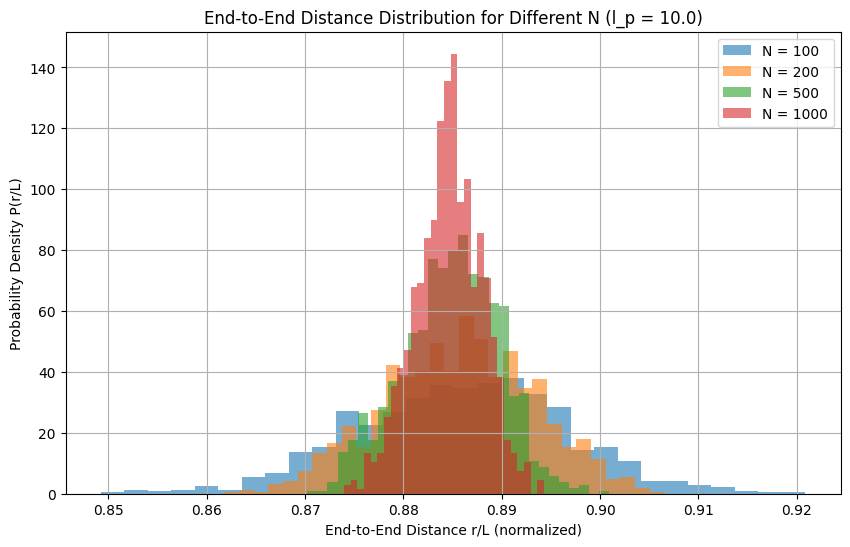

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri del modello
b = 1.0   # Lunghezza di ogni segmento
lp = 10.0 # Lunghezza di persistenza
delta_theta = np.sqrt(2 * b / lp)  # Delta(theta)

# Funzione per la distribuzione P(theta) ~ theta * exp[-(theta/delta_theta)^2]
def P_theta(theta, delta_theta):
    return theta * np.exp(-(theta / delta_theta) ** 2)

# Funzione per generare theta con metodo di accettazione-rifiuto
def generate_theta(delta_theta, size=1):
    thetas = []
    max_prob = P_theta(np.sqrt(2) * delta_theta, delta_theta)  # Massimo della funzione P(theta)

    while len(thetas) < size:
        # Generazione casuale di theta tra 0 e pi
        theta_trial = np.random.uniform(0, np.pi)

        # Probabilità per accettazione-rifiuto
        prob = P_theta(theta_trial, delta_theta)

        # Accettazione-rifiuto
        if np.random.uniform(0, max_prob) < prob:
            thetas.append(theta_trial)

    return np.array(thetas)

# Funzione per generare phi uniformemente distribuito in [0, 2*pi]
def generate_phi(size=1):
    return np.random.uniform(0, 2 * np.pi, size)

# Funzione per generare la Worm-like-chain
def generate_wlc(N, b, delta_theta):
    # Posizione iniziale della catena
    positions = np.zeros((N+1, 3))  # (x, y, z)

    # Angoli iniziali
    theta = generate_theta(delta_theta, 1)[0]
    phi = generate_phi(1)[0]

    # Vettore di direzione iniziale
    direction = np.array([np.sin(theta) * np.cos(phi),
                          np.sin(theta) * np.sin(phi),
                          np.cos(theta)])

    for i in range(1, N+1):
        # Generiamo i nuovi angoli theta e phi
        theta = generate_theta(delta_theta, 1)[0]
        phi = generate_phi(1)[0]

        # Aggiorniamo la direzione del segmento attuale
        direction = np.array([np.sin(theta) * np.cos(phi),
                              np.sin(theta) * np.sin(phi),
                              np.cos(theta)])

        # Aggiorniamo la posizione
        positions[i] = positions[i-1] + b * direction

    return positions

# Funzione per calcolare la distanza end-to-end
def end_to_end_distance(positions):
    # Calcola la distanza tra il primo e l'ultimo punto (positions[-1] - positions[0] sottrae le coordinate dell'ultimo punto alle coordinate del primo punto; np.linalg.norm() calcola la norma euclidea (np.sqrt((x^2+y^2+z^2))) del vettore che unisce il primo e l'ultimo punto della catena)
    return np.linalg.norm(positions[-1] - positions[0])

# Parametri della simulazione
N_values = [100, 200, 500, 1000]  # Differenti valori di N
num_simulations = 1000  # Numero di simulazioni per ogni N
distances = {}  # Per salvare le distanze end-to-end per ciascun N

# Eseguiamo la simulazione per differenti valori di N
for N in N_values:
    distances[N] = []
    for _ in range(num_simulations):
        positions = generate_wlc(N, b, delta_theta)
        r = end_to_end_distance(positions)
        distances[N].append(r / (N * b))  # Normalizziamo r rispetto alla lunghezza totale L = N * b

# Plot delle distribuzioni della distanza end-to-end normalizzata
plt.figure(figsize=(10, 6))
for N in N_values:
    plt.hist(distances[N], bins=30, density=True, alpha=0.6, label=f'N = {N}')
plt.xlabel('End-to-End Distance r/L (normalized)')
plt.ylabel('Probability Density P(r/L)')
plt.title(f'End-to-End Distance Distribution for Different N (l_p = {lp})')
plt.legend()
plt.grid(True)
plt.show()


Continuando a studiare le proprietà fisiche della catena, vediamo ora cosa succede se fisso un valore di $N$ e faccio variare la lunghezza di persistenza $l_p$.
Dalla teoria ci aspettiamo che:


*   Per valori di $l_p$ più grandi, la catena diventa più rigida, e la distribuzione della distanza end-to-end si concentrerà su valori più vicini a 1 (cioè $r/L$ sarà vicino a 1, perché la catena è quasi rettilinea).
*   Per valori di $l_p$ più piccoli, la catena diventa più flessibile, e la distribuzione della distanza end-to-end sarà più ampia, con una media più piccola, poiché la catena si piega e si aggroviglia di più.



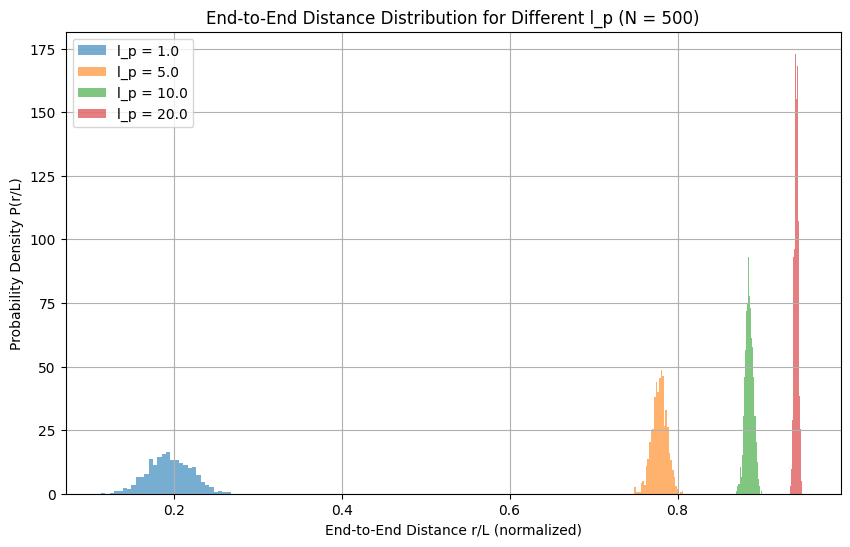

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri del modello
b = 1.0   # Lunghezza di ogni segmento (unitaria)

# Funzione per la distribuzione P(theta) ~ theta * exp[-(theta/delta_theta)^2]
def P_theta(theta, delta_theta):
    return theta * np.exp(-(theta / delta_theta) ** 2)

# Funzione per generare theta con metodo di accettazione-rifiuto
def generate_theta(delta_theta, size=1):
    thetas = []
    max_prob = P_theta(np.sqrt(2) * delta_theta, delta_theta)  # Massimo della funzione P(theta)

    while len(thetas) < size:
        # Generazione casuale di theta tra 0 e pi
        theta_trial = np.random.uniform(0, np.pi)

        # Probabilità per accettazione-rifiuto
        prob = P_theta(theta_trial, delta_theta)

        # Accettazione-rifiuto
        if np.random.uniform(0, max_prob) < prob:
            thetas.append(theta_trial)

    return np.array(thetas)

# Funzione per generare phi uniformemente distribuito in [0, 2*pi]
def generate_phi(size=1):
    return np.random.uniform(0, 2 * np.pi, size)

# Funzione per generare la Worm-like-chain
def generate_wlc(N, b, delta_theta):
    # Posizione iniziale della catena
    positions = np.zeros((N+1, 3))  # (x, y, z)

    # Angoli iniziali
    theta = generate_theta(delta_theta, 1)[0]
    phi = generate_phi(1)[0]

    # Vettore di direzione iniziale
    direction = np.array([np.sin(theta) * np.cos(phi),
                          np.sin(theta) * np.sin(phi),
                          np.cos(theta)])

    for i in range(1, N+1):
        # Generiamo i nuovi angoli theta e phi
        theta = generate_theta(delta_theta, 1)[0]
        phi = generate_phi(1)[0]

        # Aggiorniamo la direzione del segmento attuale
        direction = np.array([np.sin(theta) * np.cos(phi),
                              np.sin(theta) * np.sin(phi),
                              np.cos(theta)])

        # Aggiorniamo la posizione
        positions[i] = positions[i-1] + b * direction

    return positions

# Funzione per calcolare la distanza end-to-end
def end_to_end_distance(positions):
    # Calcola la distanza tra il primo e l'ultimo punto
    return np.linalg.norm(positions[-1] - positions[0])

# Parametri della simulazione
N = 500  # Numero di segmenti fissato
lp_values = [1.0, 5.0, 10.0, 20.0]  # Differenti lunghezze di persistenza
num_simulations = 1000  # Numero di simulazioni per ogni l_p
distances = {}  # Per salvare le distanze end-to-end per ciascun l_p

# Eseguiamo la simulazione per differenti valori di l_p
for lp in lp_values:
    distances[lp] = []
    delta_theta = np.sqrt(2 * b / lp)
    for _ in range(num_simulations):
        positions = generate_wlc(N, b, delta_theta)
        r = end_to_end_distance(positions)
        distances[lp].append(r / (N * b))  # Normalizziamo r rispetto alla lunghezza totale L = N * b

# Plot delle distribuzioni della distanza end-to-end normalizzata
plt.figure(figsize=(10, 6))
for lp in lp_values:
    plt.hist(distances[lp], bins=30, density=True, alpha=0.6, label=f'l_p = {lp}')
plt.xlabel('End-to-End Distance r/L (normalized)')
plt.ylabel('Probability Density P(r/L)')
plt.title(f'End-to-End Distance Distribution for Different l_p (N = {N})')
plt.legend()
plt.grid(True)
plt.show()


Sempre dalla teoria sappiamo che (evidenziamo due casi particolari già visti nel plot precedente):


*   Per $l_p$ piccolo $P(r)$ tende ad una Gaussian Chain
*   Per $l_p$ grande $P(r)$ tende ad una catena rigida




CONFRONTO CON IL MODELLO ANALITICO

Prendiamo ora un modello analitico e confrontiamolo con il nostro modello da un punto di vista qualitativo.

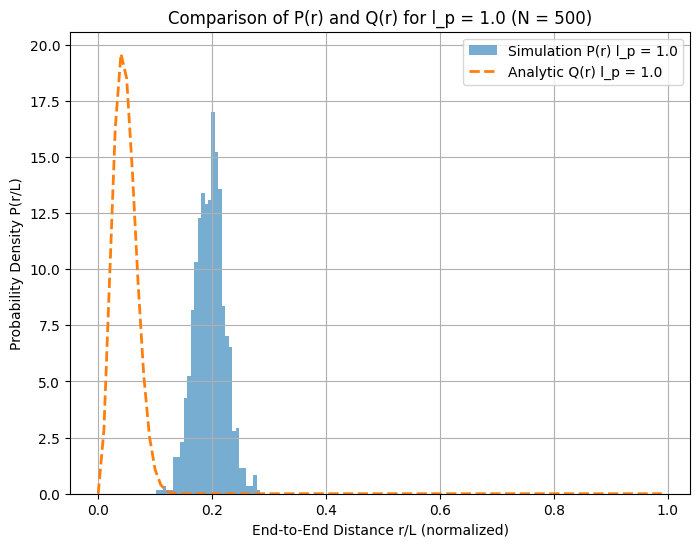

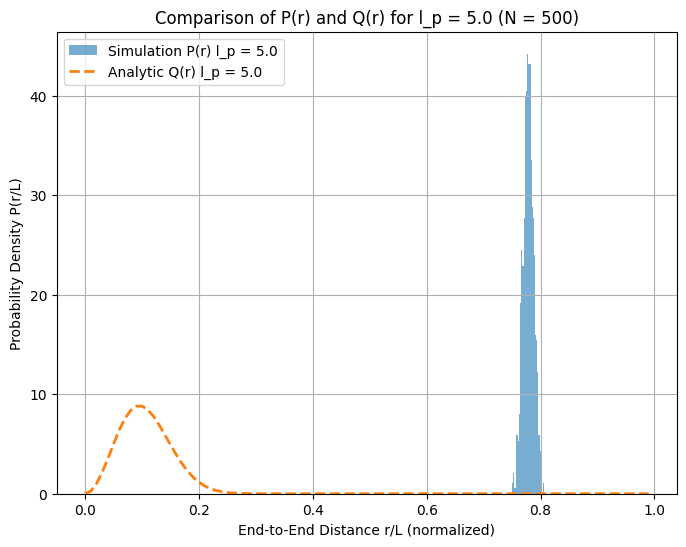

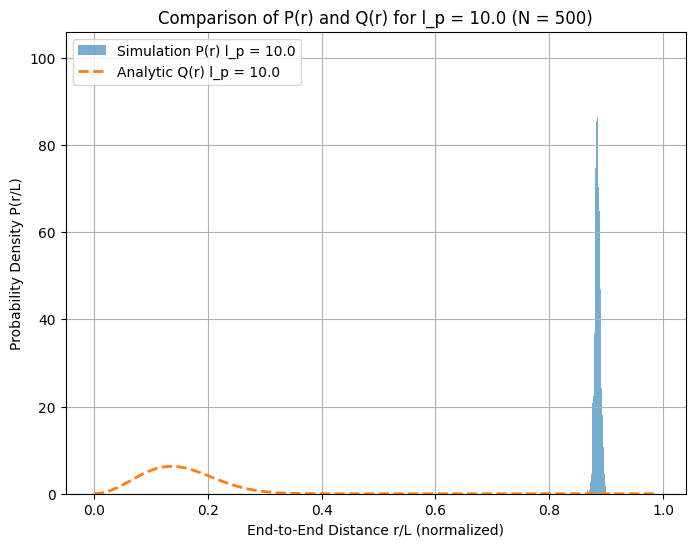

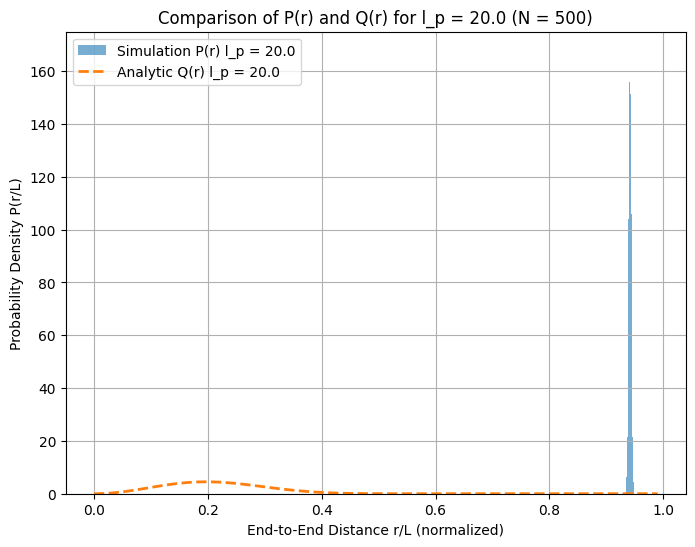

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri del modello
b = 1.0   # Lunghezza di ogni segmento

# Funzione per la distribuzione P(theta) ~ theta * exp[-(theta/delta_theta)^2]
def P_theta(theta, delta_theta):
    return theta * np.exp(-(theta / delta_theta) ** 2)

# Funzione per generare theta con metodo di accettazione-rifiuto
def generate_theta(delta_theta, size=1):
    thetas = []
    max_prob = P_theta(np.sqrt(2) * delta_theta, delta_theta)  # Massimo della funzione P(theta)

    while len(thetas) < size:
        theta_trial = np.random.uniform(0, np.pi)
        prob = P_theta(theta_trial, delta_theta)
        if np.random.uniform(0, max_prob) < prob:
            thetas.append(theta_trial)

    return np.array(thetas)

# Funzione per generare phi uniformemente distribuito in [0, 2*pi]
def generate_phi(size=1):
    return np.random.uniform(0, 2 * np.pi, size)

# Funzione per generare la Worm-like-chain
def generate_wlc(N, b, delta_theta):
    positions = np.zeros((N+1, 3))  # (x, y, z)
    theta = generate_theta(delta_theta, 1)[0]
    phi = generate_phi(1)[0]
    direction = np.array([np.sin(theta) * np.cos(phi),
                          np.sin(theta) * np.sin(phi),
                          np.cos(theta)])

    for i in range(1, N+1):
        theta = generate_theta(delta_theta, 1)[0]
        phi = generate_phi(1)[0]
        direction = np.array([np.sin(theta) * np.cos(phi),
                              np.sin(theta) * np.sin(phi),
                              np.cos(theta)])
        positions[i] = positions[i-1] + b * direction

    return positions

# Funzione per calcolare la distanza end-to-end
def end_to_end_distance(positions):
    return np.linalg.norm(positions[-1] - positions[0])

# Funzione per la distribuzione analitica approssimata Q(r, t)
def Q_r(r, t):
    alpha = 3 * t / 4

    if alpha <= 0:
        return np.zeros_like(r)  # Restituisce zero per evitare divisioni per zero

    C = 1 / ((np.pi ** (3 / 2)) * np.exp(-alpha) * alpha ** (-3 / 2) *
             (1 + 3 / alpha + (15 / 4) / alpha ** 2))

    prefactor = (4 * np.pi * C)
    term1 = r ** 2 / (1 - r ** 2) ** (9 / 2)
    term2 = np.exp(-alpha / (1 - r ** 2))
    return prefactor * term1 * term2

# Parametri della simulazione
N = 500  # Numero di segmenti fissato
lp_values = [1.0, 5.0, 10.0, 20.0]
num_simulations = 1000  # Numero di simulazioni per ogni l_p
distances = {}  # Per salvare le distanze end-to-end per ciascun l_p

# Eseguiamo la simulazione per differenti valori di l_p
for lp in lp_values:
    distances[lp] = []
    delta_theta = np.sqrt(2 * b / lp)  # Delta(theta)
    for _ in range(num_simulations):
        positions = generate_wlc(N, b, delta_theta)
        r = end_to_end_distance(positions)
        distances[lp].append(r / (N * b))  # Normalizziamo r rispetto alla lunghezza totale L = N * b

# Plot delle distribuzioni della distanza end-to-end
r_values = np.linspace(0, 0.99, 100)  # Valori di r normalizzati per il grafico teorico

for lp in lp_values:
    plt.figure(figsize=(8, 6))

    # Parametro t = L / l_0 con l_0 = (2/3) * l_p
    l0 = (2 / 3) * lp
    L_total = N * b
    t = L_total / l0

    # Calcoliamo la distribuzione analitica approssimata Q(r)
    Q_values = Q_r(r_values, t)

    # Normalizziamo la distribuzione teorica
    Q_values /= np.trapz(Q_values, r_values)  # Assicuriamoci che l'area sotto la curva sia 1

    # Istogramma della distribuzione simulata
    plt.hist(distances[lp], bins=30, density=True, alpha=0.6, label=f'Simulation P(r) l_p = {lp}')

    # Curva analitica approssimata Q(r)
    plt.plot(r_values, Q_values, '--', lw=2, label=f'Analytic Q(r) l_p = {lp}')

    plt.xlabel('End-to-End Distance r/L (normalized)')
    plt.ylabel('Probability Density P(r/L)')
    plt.title(f'Comparison of P(r) and Q(r) for l_p = {lp} (N = {N})')
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=0)
    plt.show()


Ora confrontiamo il modello analitico con il nostro modello da un punto di vista quantitativo: usiamo come parametro l'errore quadratico medio (EQM).

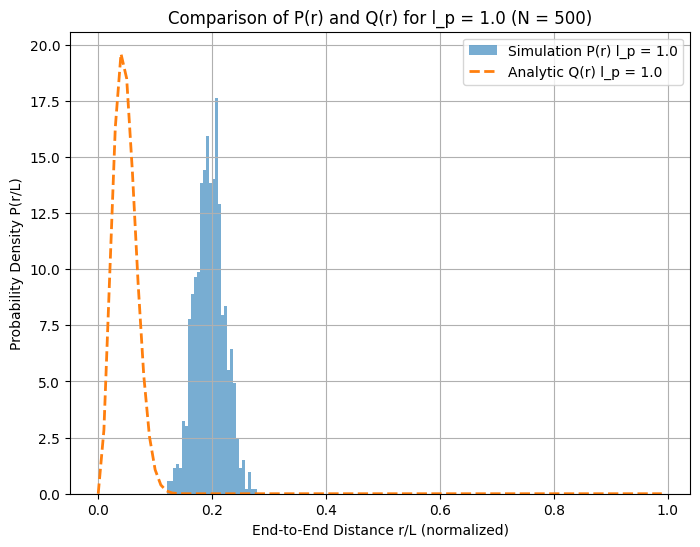

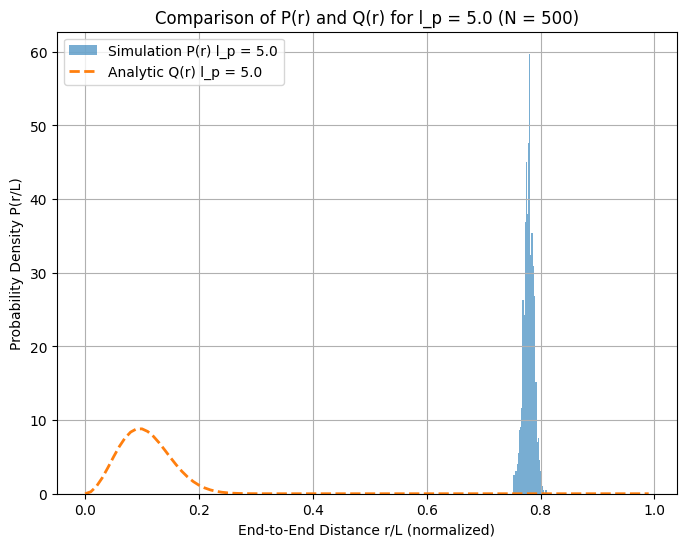

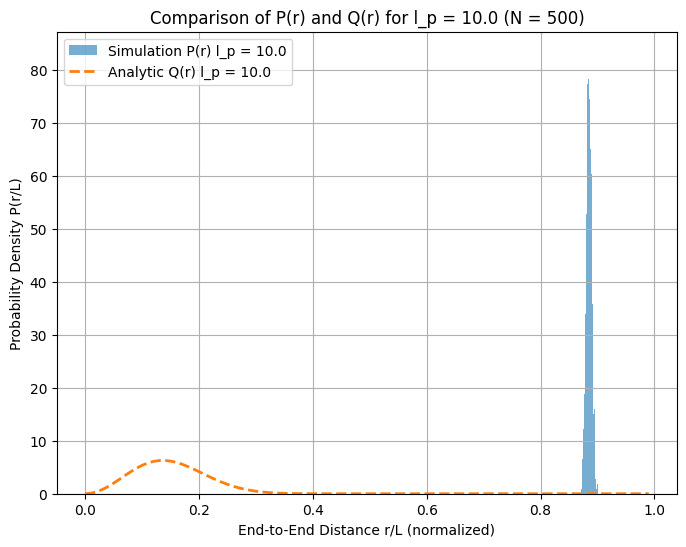

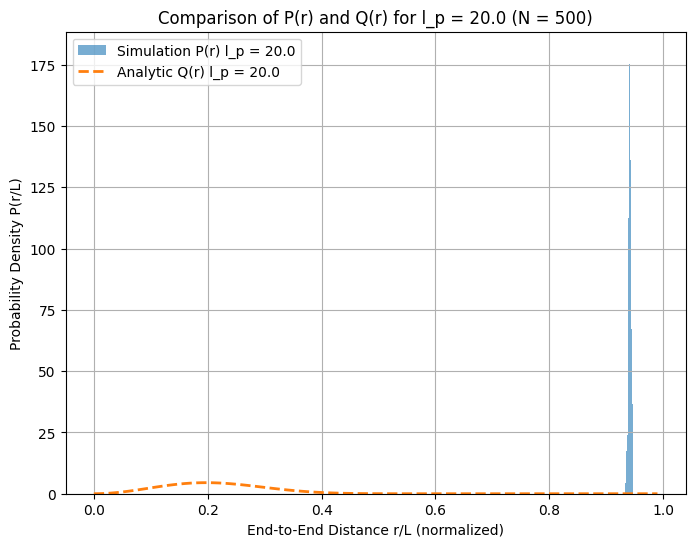

Valori di EQM per ogni l_p:
l_p = 1.0: EQM = 8.3886
l_p = 5.0: EQM = 23.7341
l_p = 10.0: EQM = 42.7138
l_p = 20.0: EQM = 93.8094


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri del modello
b = 1.0   # Lunghezza di ogni segmento

# Funzione per la distribuzione P(theta) ~ theta * exp[-(theta/delta_theta)^2]
def P_theta(theta, delta_theta):
    return theta * np.exp(-(theta / delta_theta) ** 2)

# Funzione per generare theta con metodo di accettazione-rifiuto
def generate_theta(delta_theta, size=1):
    thetas = []
    max_prob = P_theta(np.sqrt(2) * delta_theta, delta_theta)  # Massimo della funzione P(theta)

    while len(thetas) < size:
        theta_trial = np.random.uniform(0, np.pi)
        prob = P_theta(theta_trial, delta_theta)
        if np.random.uniform(0, max_prob) < prob:
            thetas.append(theta_trial)

    return np.array(thetas)

# Funzione per generare phi uniformemente distribuito in [0, 2*pi]
def generate_phi(size=1):
    return np.random.uniform(0, 2 * np.pi, size)

# Funzione per generare la Worm-like-chain
def generate_wlc(N, b, delta_theta):
    positions = np.zeros((N+1, 3))  # (x, y, z)
    theta = generate_theta(delta_theta, 1)[0]
    phi = generate_phi(1)[0]
    direction = np.array([np.sin(theta) * np.cos(phi),
                          np.sin(theta) * np.sin(phi),
                          np.cos(theta)])

    for i in range(1, N+1):
        theta = generate_theta(delta_theta, 1)[0]
        phi = generate_phi(1)[0]
        direction = np.array([np.sin(theta) * np.cos(phi),
                              np.sin(theta) * np.sin(phi),
                              np.cos(theta)])
        positions[i] = positions[i-1] + b * direction

    return positions

# Funzione per calcolare la distanza end-to-end
def end_to_end_distance(positions):
    return np.linalg.norm(positions[-1] - positions[0])

# Funzione per la distribuzione analitica approssimata Q(r, t)
def Q_r(r, t):
    alpha = 3 * t / 4

    if alpha <= 0:
        return np.zeros_like(r)

    C = 1 / ((np.pi ** (3 / 2)) * np.exp(-alpha) * alpha ** (-3 / 2) *
             (1 + 3 / alpha + (15 / 4) / alpha ** 2))

    prefactor = (4 * np.pi * C)
    term1 = r ** 2 / (1 - r ** 2) ** (9 / 2)
    term2 = np.exp(-alpha / (1 - r ** 2))
    return prefactor * term1 * term2

# Funzione per calcolare l'EQM
def calculate_EQM(P_values, Q_values):
    return np.sqrt(np.mean((P_values - Q_values) ** 2))

# Parametri della simulazione
N = 500  # Numero di segmenti fissato
lp_values = [1.0, 5.0, 10.0, 20.0]
num_simulations = 1000  # Numero di simulazioni per ogni l_p
distances = {}  # Per salvare le distanze end-to-end per ciascun l_p
EQM_values = []  # Per memorizzare i valori di EQM

# Eseguiamo la simulazione per differenti valori di l_p
for lp in lp_values:
    distances[lp] = []
    delta_theta = np.sqrt(2 * b / lp)  # Delta(theta) determinato dalla lunghezza di persistenza
    for _ in range(num_simulations):
        positions = generate_wlc(N, b, delta_theta)
        r = end_to_end_distance(positions)
        distances[lp].append(r / (N * b))  # Normalizziamo r rispetto alla lunghezza totale L = N * b

# Plot separati delle distribuzioni della distanza end-to-end
r_values = np.linspace(0, 0.99, 100)  # Valori di r normalizzati per il grafico teorico

for lp in lp_values:
    plt.figure(figsize=(8, 6))

    # Parametro t = L / l_0 con l_0 = (2/3) * l_p
    l0 = (2 / 3) * lp
    L_total = N * b
    t = L_total / l0

    # Calcoliamo la distribuzione analitica approssimata Q(r)
    Q_values = Q_r(r_values, t)

    # Normalizziamo la distribuzione teorica
    Q_values /= np.trapz(Q_values, r_values)

    # Istogramma della distribuzione simulata
    P_values, bins = np.histogram(distances[lp], bins=30, density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])  # Calcola i centri dei bin per il grafico

    # Interpoliamo Q_values per allinearla con i centri dei bin
    Q_interp = np.interp(bin_centers, r_values, Q_values)

    # Calcola RMSE
    EQM = calculate_EQM(P_values, Q_interp)
    EQM_values.append((lp, EQM))

    # Plot delle distribuzioni
    plt.hist(distances[lp], bins=30, density=True, alpha=0.6, label=f'Simulation P(r) l_p = {lp}')
    plt.plot(r_values, Q_values, '--', lw=2, label=f'Analytic Q(r) l_p = {lp}')

    plt.xlabel('End-to-End Distance r/L (normalized)')
    plt.ylabel('Probability Density P(r/L)')
    plt.title(f'Comparison of P(r) and Q(r) for l_p = {lp} (N = {N})')
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=0)
    plt.show()

# Stampa i valori di eqm
print("Valori di EQM per ogni l_p:")
for lp, EQM in EQM_values:
    print(f"l_p = {lp}: EQM = {EQM:.4f}")
